## CSC373 Project
### Authors: Alice Li, Shawn Lang, Ziang Xu
#### Data Link: https://figshare.com/articles/dataset/3b_Soybean_Intensification_csv/10070285/4 
##### This dataset is a combination of data from the USDA National Statistics Service, Economic Research Service and NOAA climate data. 

### 1. Feasibility Analysis

In this part, we perform the feasibility analysis and EDA on the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from statistics import mean
import plotly.express as px

In [2]:
#!pip install plotly

In [3]:
import my_utils
import estimator
import evaluator

Using TensorFlow backend.
/Users/lxa/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lxa/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lxa/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lxa/opt/anaconda3/lib/python3.7/site-packag

In [4]:
dir_path = '../data/'
my_utils.check_datasets(dir_path, index_col=None, transpose_flag=False)

Total number of files 1


In [5]:
dataset = pd.read_csv('../data/Soybean_Intensification.csv', index_col=None)

In [6]:
dataset

Year  County.Code  USDA.agricultural.region  Soybean.Yield.(Bu)  \
0      1990        17001                         1           33.399502   
1      1991        17001                         1           36.500000   
2      1992        17001                         1           38.500000   
3      1993        17001                         1           40.000000   
4      1994        17001                         1           46.000000   
...     ...          ...                       ...                 ...   
49023  2013        51810                         6           40.236840   
49024  2014        51810                         6           41.000000   
49025  2015        51810                         6           35.304350   
49026  2016        51810                         6           38.411210   
49027  2017        51810                         6           42.830190   

       Soybean.Acres.Planted  Soybean.Price.Lag1  3year.Expectation  \
0                   122600.0                5.85         111.268417   
1                   113000.0                5.85          77.673253   
2                   120000.0                5.70         113.455434   
3                   127000.0                5.69         107.491681   
4                   114000.0                6.49         105.436050   
...                      ...                 ...                ...   
49023                12750.0               14.00         208.383600   
49024                12100.0               11.95         226.486400   
49025                11700.0                9.90         231.874800   
49026                10900.0                8.80         133.450700   
49027                10700.0                9.40          57.040890   

       Half.Planted.Day  Potash.Application.Rate  Nitrogen.Application.Rate  \
0                 161.0                 96.00000                   25.00000   
1                 139.0                 91.00000                   21.00000   
2                 138.0                 86.00000                   20.00000   
3                 150.0                 90.00000                   24.00000   
4                 149.0                 97.00000                   33.00000   
...                 ...                      ...                        ...   
49023             159.0                 82.66666                   23.66667   
49024             159.0                 82.33333                   24.33333   
49025             158.0                 82.00000                   25.00000   
49026             171.0                 82.00000                   25.00000   
49027             155.0                 82.00000                   25.00000   

       Phosphate.Application.Rate  GM.Uptake  Chemicals.Expenditure  \
0                        58.00000   0.000000            680000000.0   
1                        60.00000   0.000000            680000000.0   
2                        53.00000   0.000000            680000000.0   
3                        57.00000   0.000000            680000000.0   
4                        62.00000   0.000000            680000000.0   
...                           ...        ...                    ...   
49023                    46.33334   7.765873            310000000.0   
49024                    47.66667   7.857143            330000000.0   
49025                    49.00000   7.833333            320000000.0   
49026                    49.00000   7.821429            305000000.0   
49027                    49.00000   7.833333            310000000.0   

       Machinery.Expenditure  Irrigated.Pct  Precipitation.GrowingSeason  \
0                190000000.0       0.100326                    19.468788   
1                190000000.0       0.130973                    21.043240   
2                190000000.0       0.119167                    18.394499   
3                190000000.0       0.123622                    19.088007   
4                190000000.0       0.149123                    19.378613   
...    

In [7]:
"""
After consideration, we believe that we want to change County.Code to string and USDA.agricultural.region to 
category variable. For feature Year, we want it to remain integer, because me may want to consider the changes 
of other numerical features over the years. For fit and transform, we will choose the remaining numerical features 
and put them into preprocessor process. 
""" 
dataset['County.Code'] = dataset['County.Code'].astype('category')
dataset['USDA.agricultural.region'] = dataset['USDA.agricultural.region'].astype('category')
dataset['Year'] = dataset['Year'].astype('category')
dataset = dataset.drop(columns=['Soybean.Price.Lag1','3year.Expectation','Half.Planted.Day'])

In [8]:
dataset.describe()

Soybean.Yield.(Bu)  Soybean.Acres.Planted  Potash.Application.Rate  \
count        49028.000000           49028.000000             49028.000000   
mean            36.131529           37196.350861                70.673524   
std             11.054962           48724.452113                24.725760   
min              0.674194              50.000000                 9.000000   
25%             28.249378            2200.000000                60.000000   
50%             36.195170           14000.000000                75.000000   
75%             44.032467           61000.000000                85.000000   
max             73.050710          541000.000000               164.000000   

       Nitrogen.Application.Rate  Phosphate.Application.Rate     GM.Uptake  \
count               49028.000000                49028.000000  49028.000000   
mean                   22.036429                   47.554521     40.574100   
std                     7.617533                   10.409952     41.241556   
min                    11.000000                   22.000000      0.000000   
25%                    16.000000                   41.000000      0.000000   
50%                    20.000000                   46.333330     25.500000   
75%                    26.000000                   53.000000     89.000000   
max                    61.000000                  103.000000     99.000000   

       Chemicals.Expenditure  Machinery.Expenditure  Irrigated.Pct  \
count           4.902800e+04           4.902800e+04   49028.000000   
mean            3.840194e+08           1.869902e+08       0.433485   
std             2.031619e+08           1.245050e+08       0.386010   
min             1.800000e+08           3.000000e+07       0.000000   
25%             2.300000e+08           9.000000e+07       0.086957   
50%             3.200000e+08           1.600000e+08       0.297619   
75%             4.600000e+08           2.300000e+08       0.900000   
max             1.160000e+09           8.100000e+08       1.000000   

       Precipitation.GrowingSeason  Temperature.GrowingSeason  
count                 49028.000000               49028.000000  
mean                     20.397280                  13.513578  
std                       4.736543                   2.907943  
min                      11.694560                   4.840482  
25%                      17.762655                  11.397067  
50%                      19.991040                  13.554908  
75%                      22.082260                  15.662022  
max                      90.698540                  22.432130

In [9]:
""" We here choose numeric features that put into fit and transform, in this way, Year, USDA.agricultural.region, 
and County.Code will not be fitted or scaled."""
numeric_columns = dataset.select_dtypes('float64').columns 
numeric_features = dataset[numeric_columns]
# remaining_columns = dataset.drop(columns=numeric_columns).columns
# remaining_features = dataset[remaining_columns]

This is a correlation matrix as we want to know the correlation between each numerical feathers. From the graph, we can find that there is no pair of features that are super high correlated. And each combination of features is showing a reasonale corelation with each others.

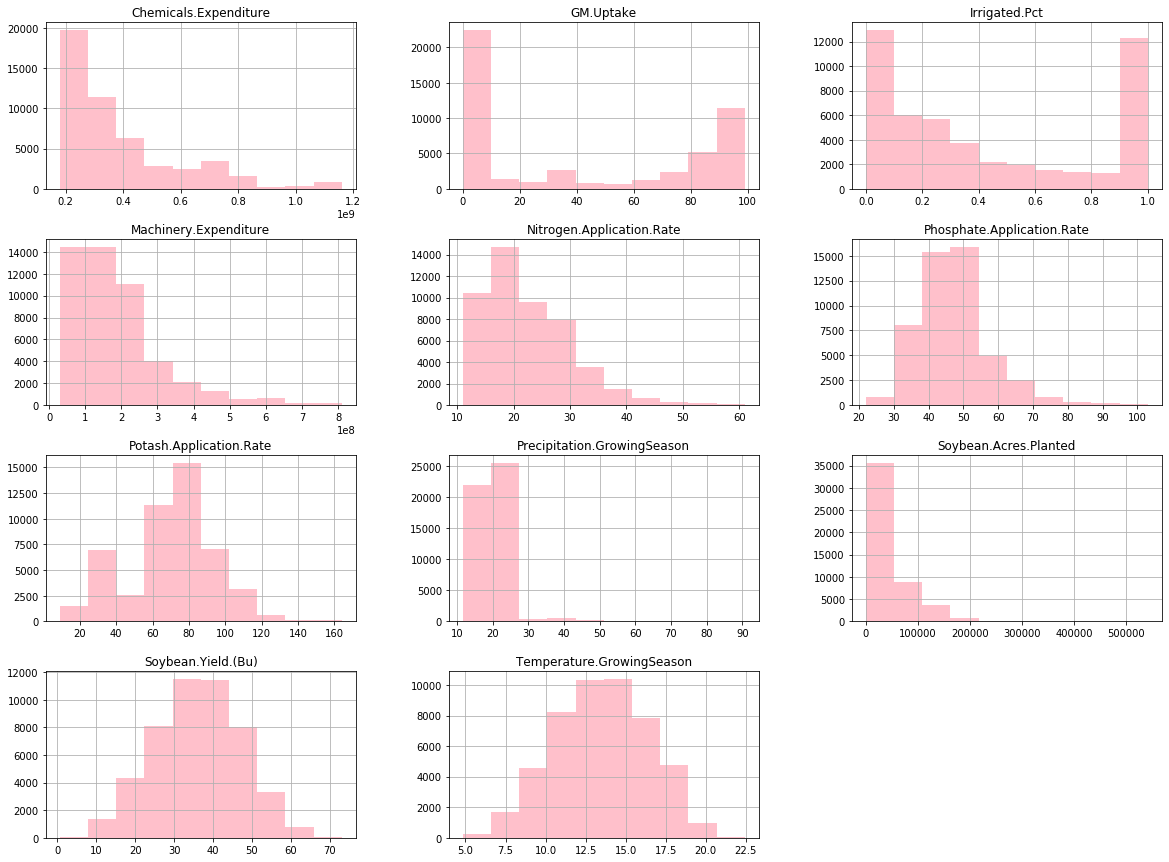

In [10]:
numeric_features.hist(figsize=(20, 15), color='pink');

Here, we are visualizing distribution of each features. Among all features, we can see that Planted.Day, Soybean.Yield, Temperature follows a roughly normal distribution, while some of feathers are skewed to right. Two special cases here are Irrigated.Pct and Gm.Uptake, they are following a binomial distribution.

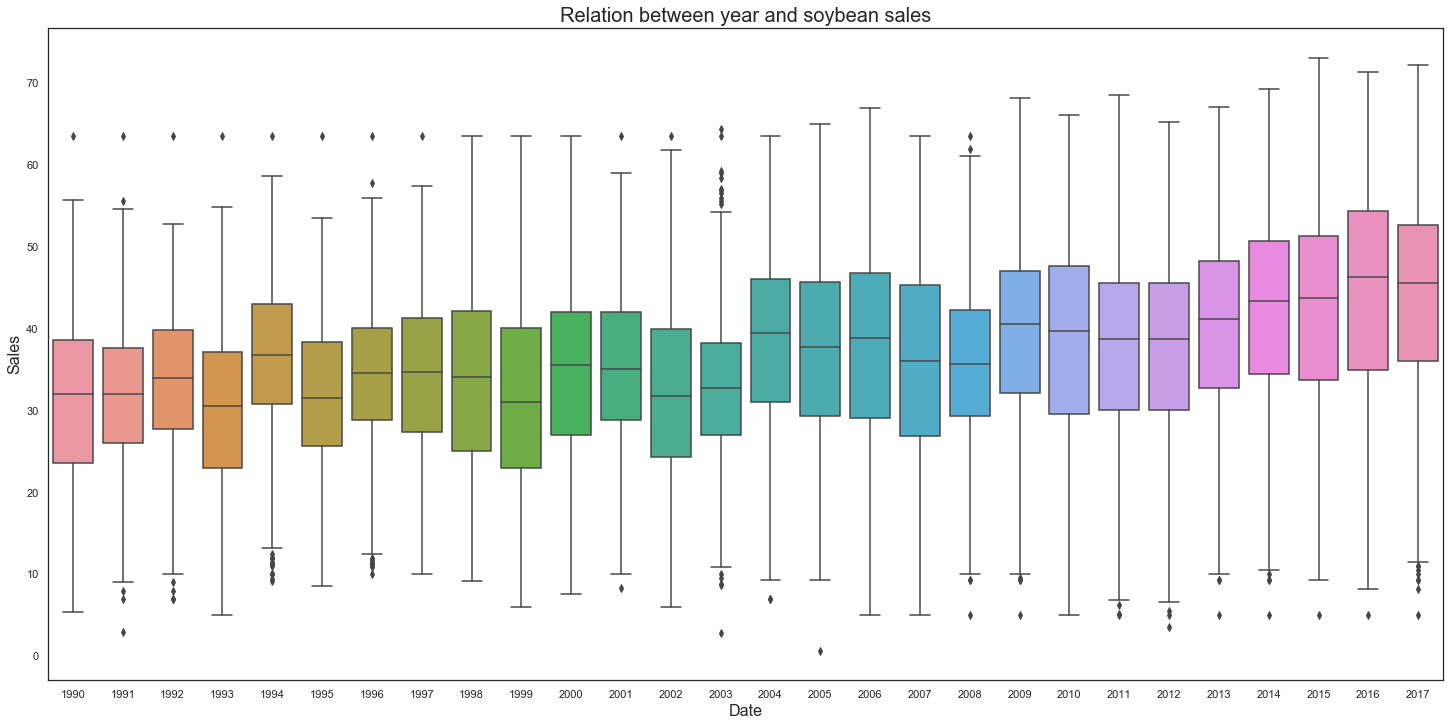

In [11]:
sns.set(rc={'figure.figsize':(25,12)});
sns.set_style("white")
sns.boxplot(x="Year", y="Soybean.Yield.(Bu)", data=dataset);
plt.xlabel('Date', fontsize=16);
plt.ylabel('Sales', fontsize=16);
plt.title('Relation between year and soybean sales', fontsize=20);

The boxplot here shows that the total soybean yield has a increasing trend over the years.

In [12]:
whole_region = dataset[['Year','Soybean.Yield.(Bu)']]
whole_region['USDA.agricultural.region'] = 0
region_data = dataset[['USDA.agricultural.region','Year','Soybean.Yield.(Bu)']]
whole = pd.concat([whole_region, region_data], axis=0)
whole = whole.reset_index()
whole

index  Year  Soybean.Yield.(Bu)  USDA.agricultural.region
0          0  1990           33.399502                         0
1          1  1991           36.500000                         0
2          2  1992           38.500000                         0
3          3  1993           40.000000                         0
4          4  1994           46.000000                         0
...      ...   ...                 ...                       ...
98051  49023  2013           40.236840                         6
98052  49024  2014           41.000000                         6
98053  49025  2015           35.304350                         6
98054  49026  2016           38.411210                         6
98055  49027  2017           42.830190                         6

[98056 rows x 4 columns]

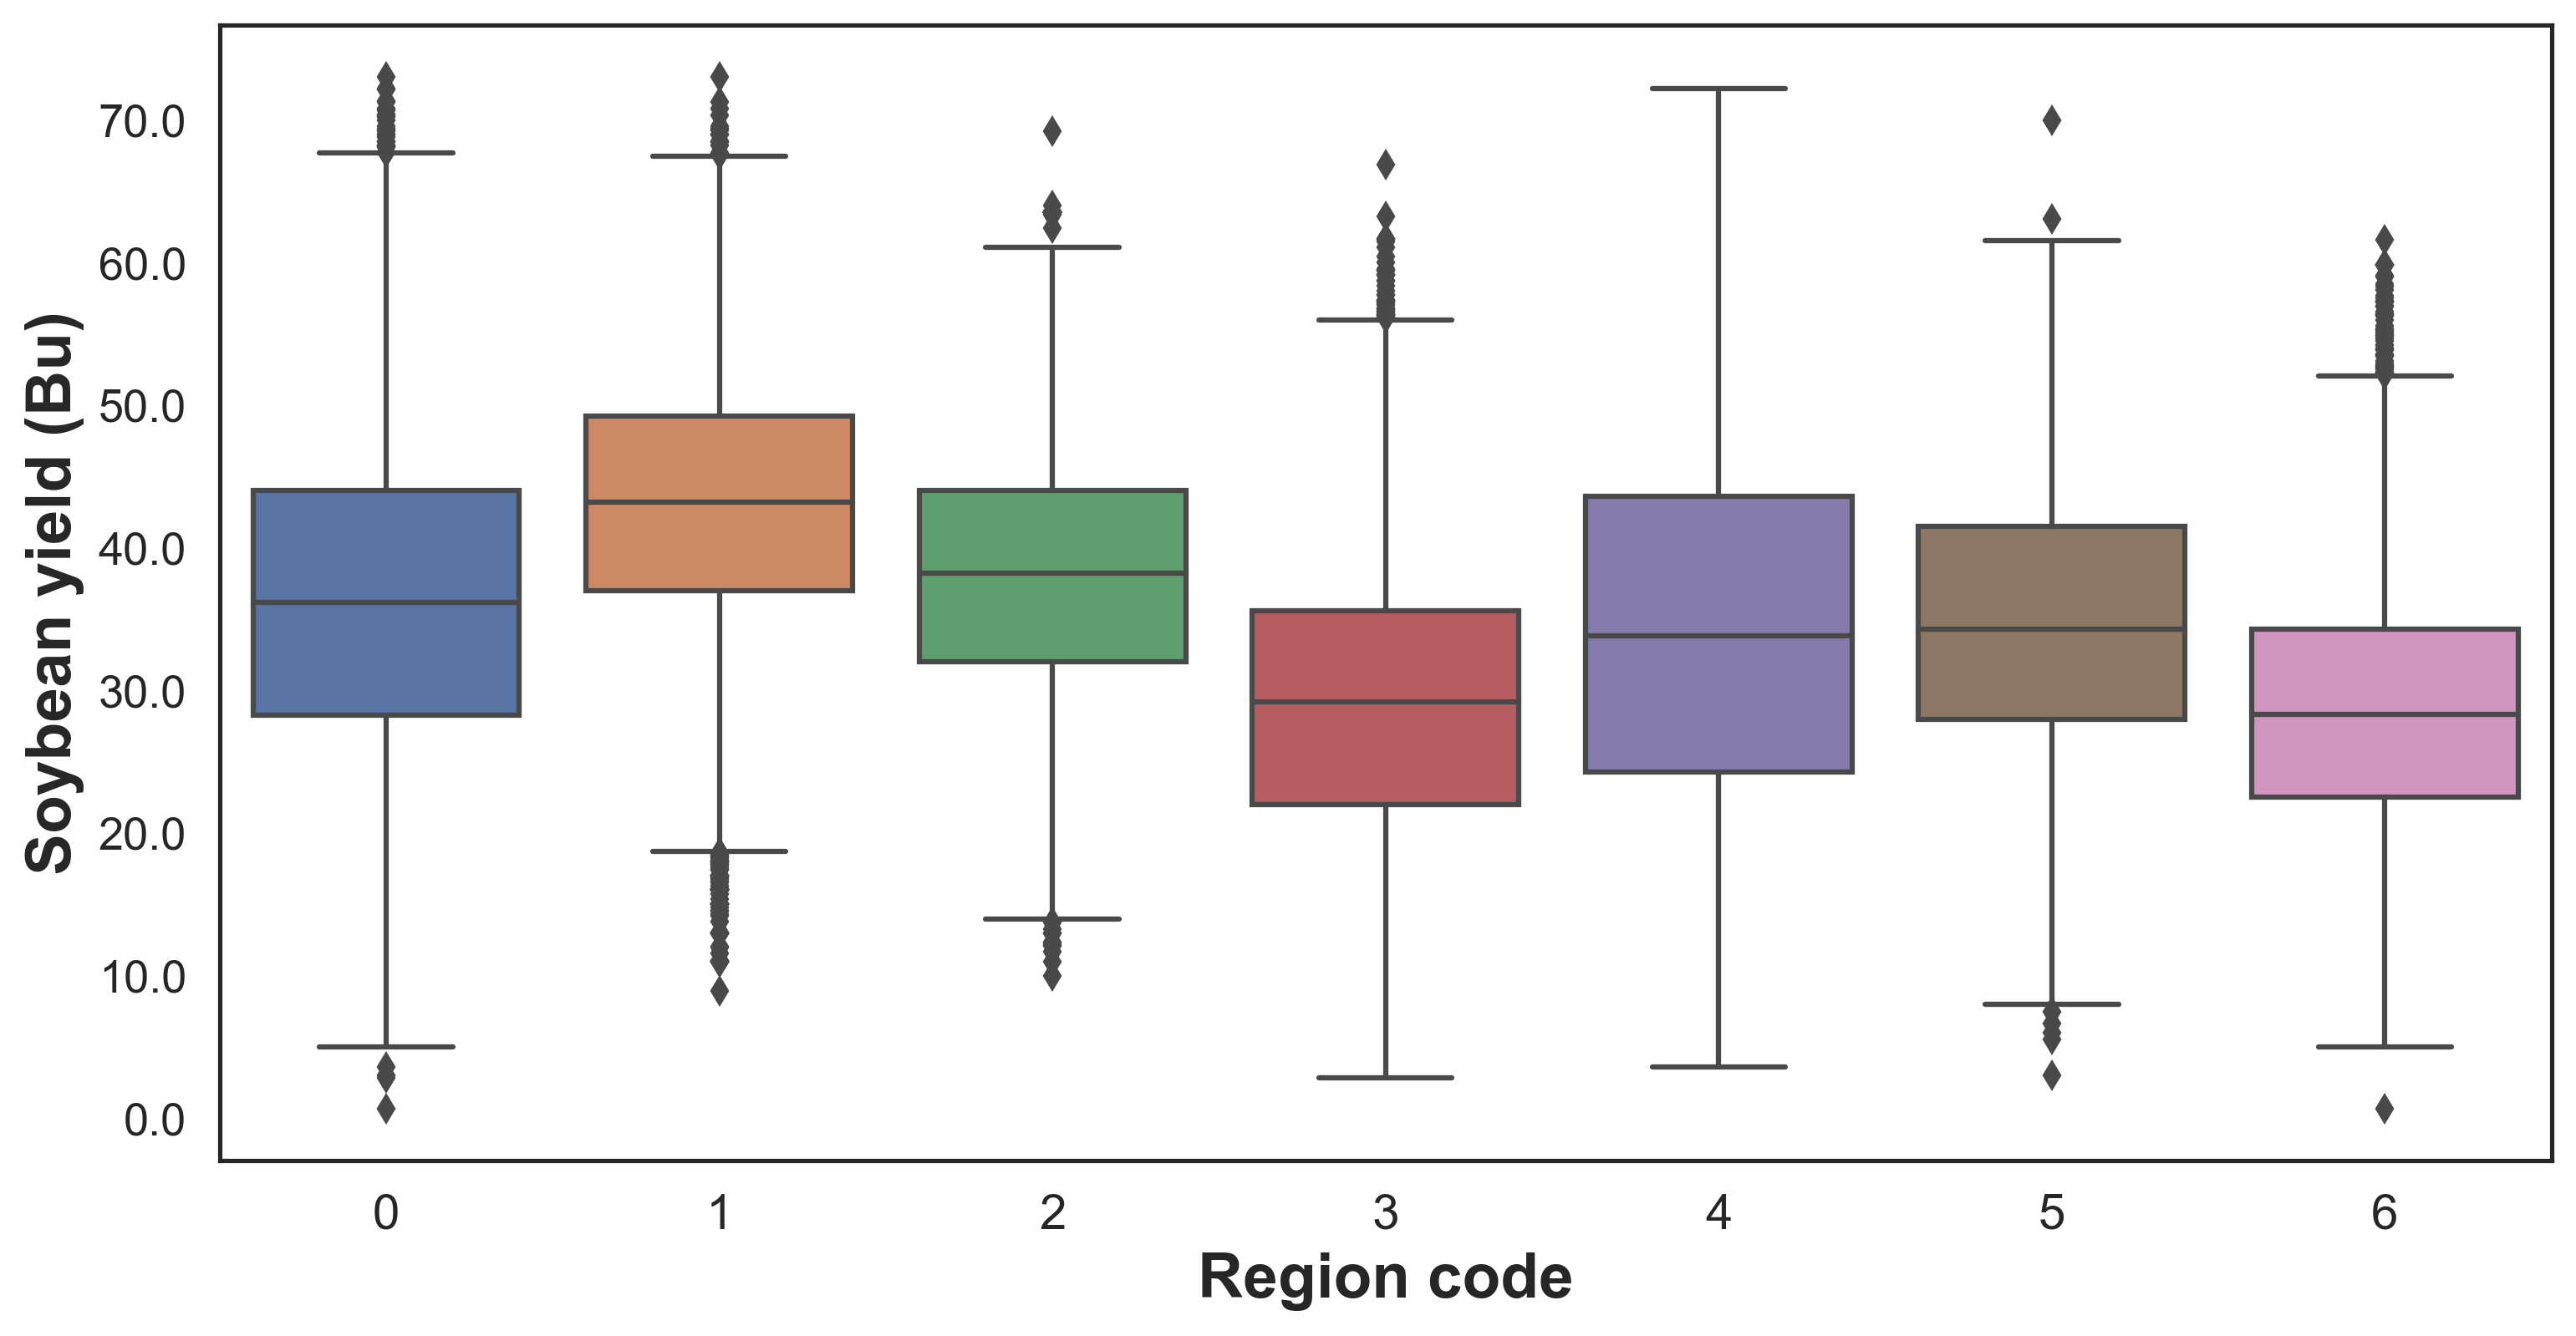

In [32]:

sns.set(rc={'figure.figsize':(12,6), 'figure.dpi':300, 'savefig.dpi':300})
sns.set_style("white")
plot = sns.boxplot(x="USDA.agricultural.region", y="Soybean.Yield.(Bu)", data=whole);
plot.set_yticklabels(plot.get_yticks(), size = 13)
plot.set_xticklabels(plot.get_xticks(), size = 14)
plt.xlabel('Region code', fontsize=18,weight='bold');
plt.ylabel('Soybean yield (Bu)', fontsize=18,weight='bold');

plt.savefig('../output/data_vis.png')

In this graph, we aggregated the data based on the region code and made a boxplot on each region code. From the box plot, we can find different regions have slightly different situations, reflecting on the median, quartile, and outlier. This plot shows we can gain some insight if we do some tasks on the different regions.

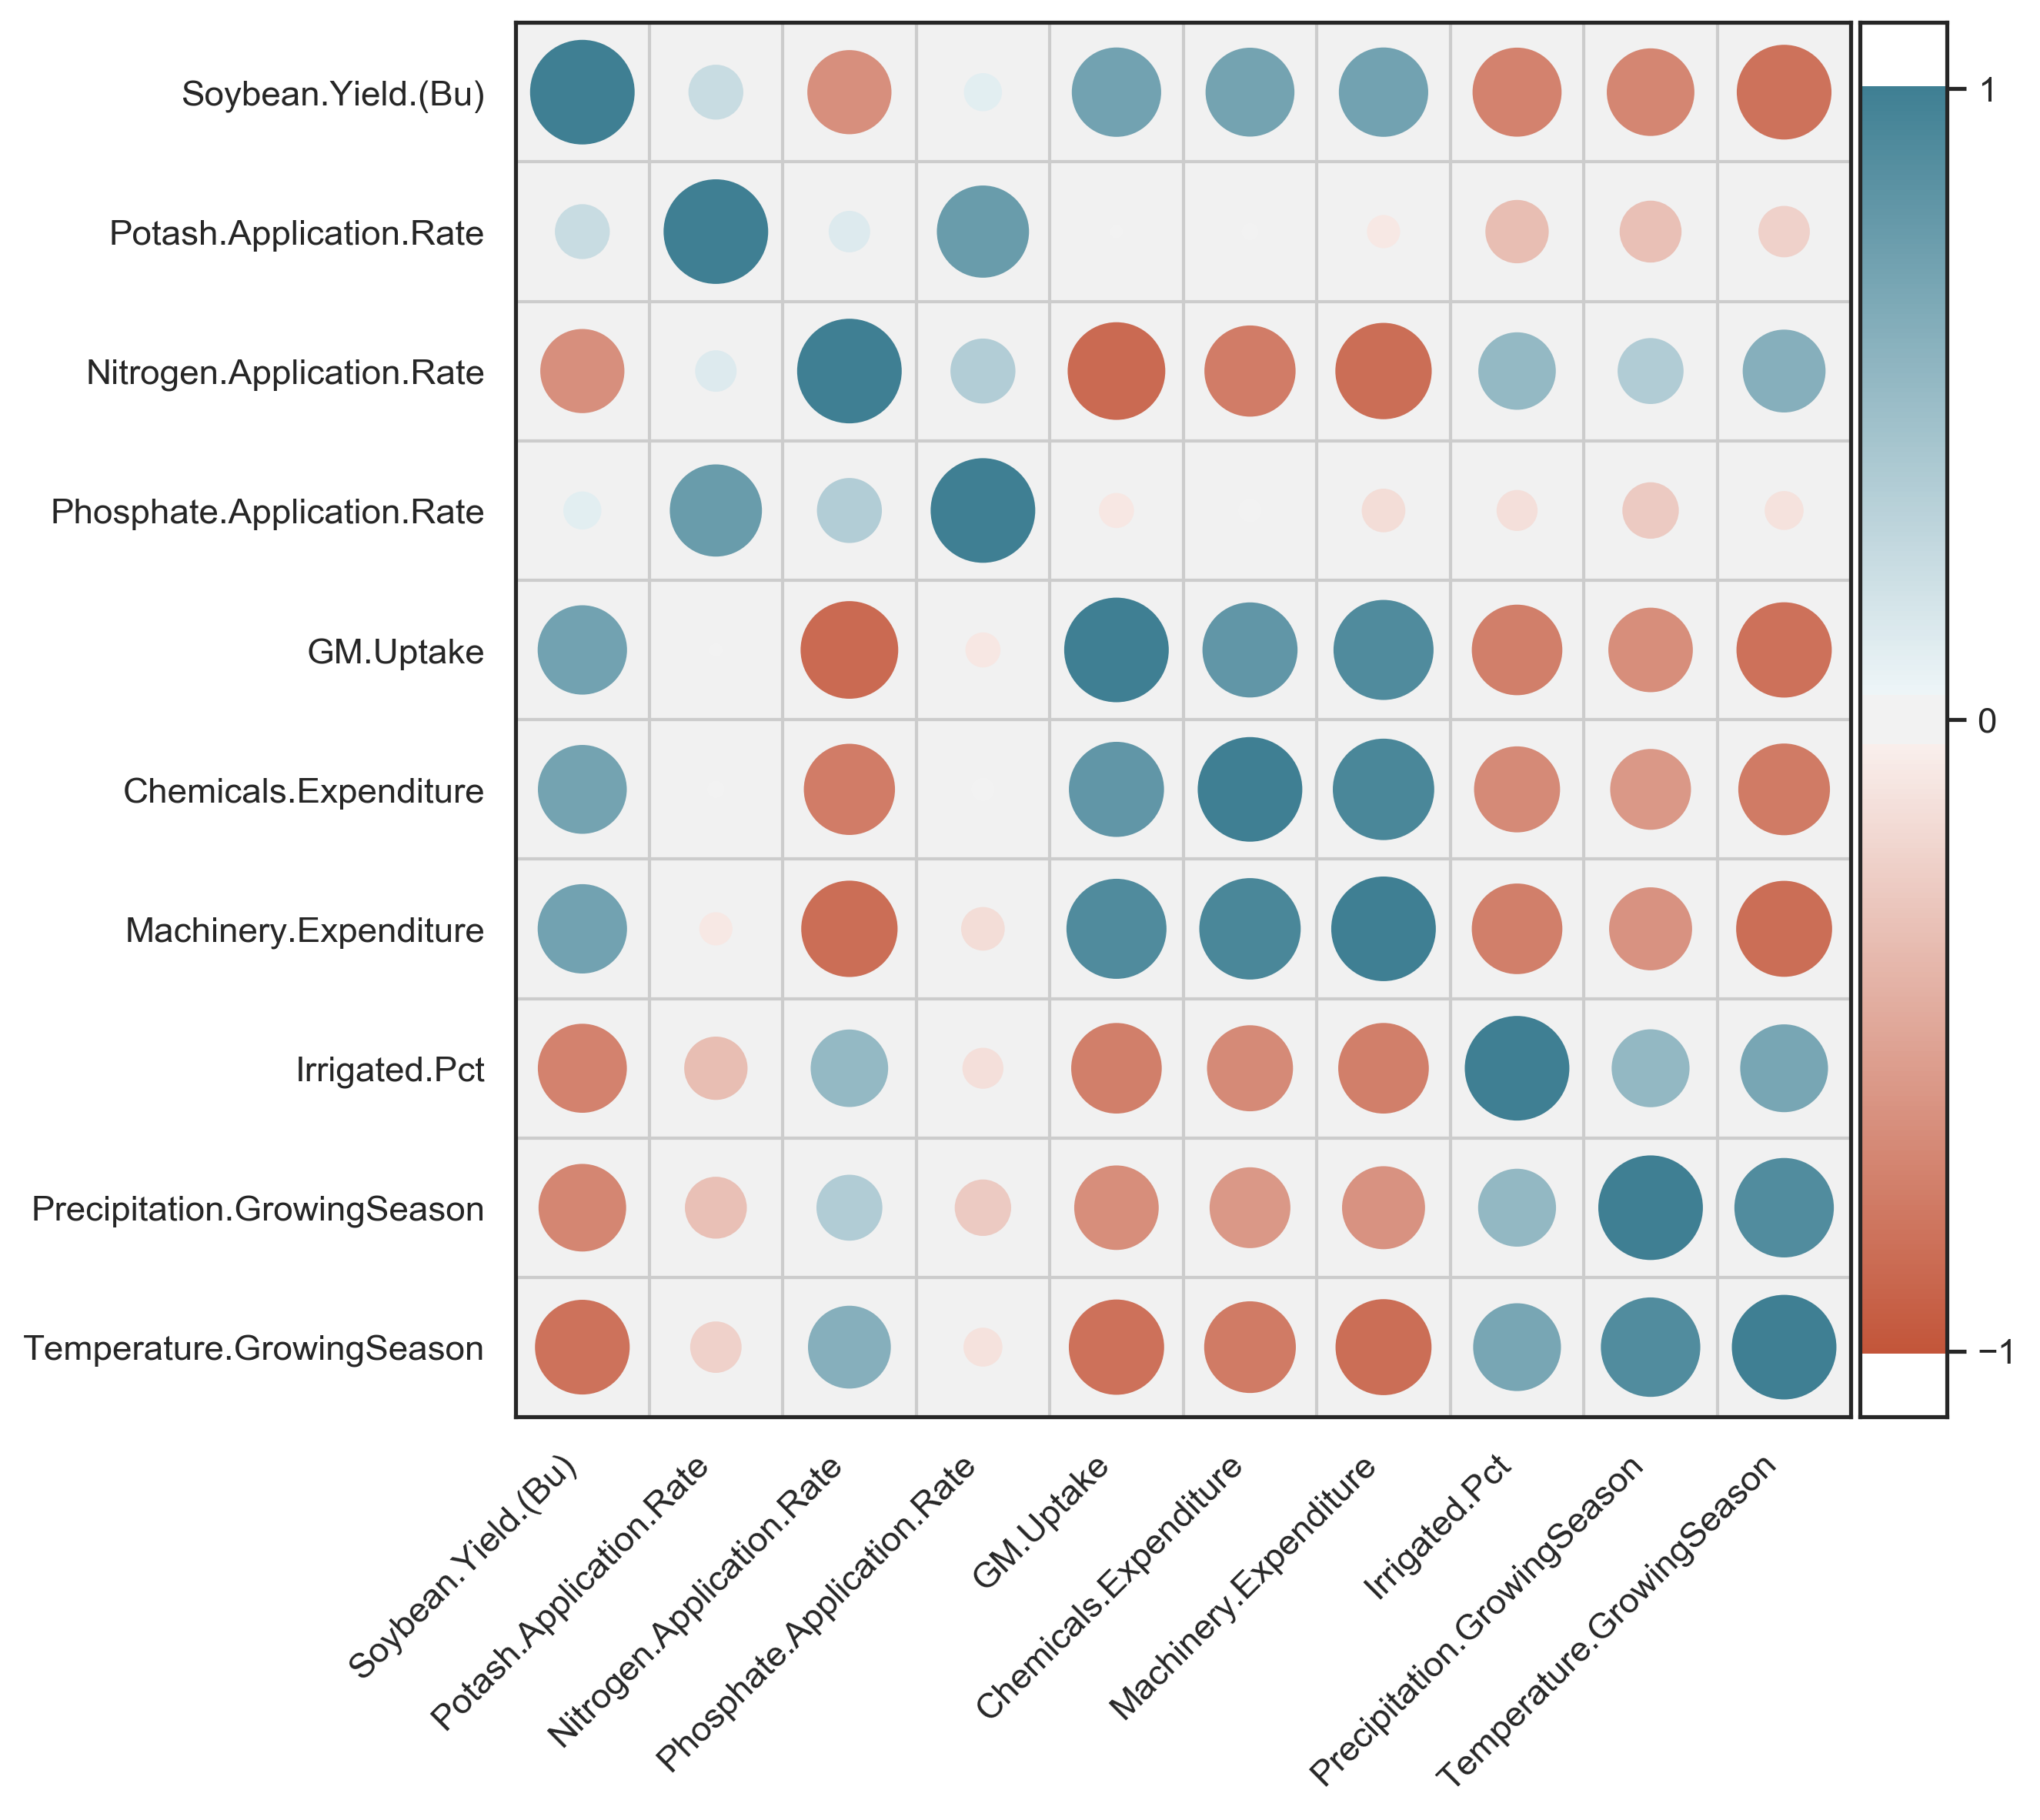

In [33]:
#!pip install heatmapz
from heatmap import heatmap, corrplot
data = pd.DataFrame(dataset.iloc[:,[3, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr())
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=1000, marker = "o");
plt.savefig('../output/data_vis2.png')

This is our correlation matrix. From the graph, we can see that there are no two highly correlated features (absolute correlation greater than 0.75). This graph shows that we do not need to drop any features from the dataset.

In [15]:
fig = px.scatter(dataset.query("Year==1990"), x="Precipitation.GrowingSeason", y="Soybean.Yield.(Bu)",
             size="Soybean.Acres.Planted", color="USDA.agricultural.region",
             hover_name="County.Code", log_x=True, size_max=60)
fig.show()

In [16]:
fig = px.scatter(dataset.query("Year==2017"), x="Precipitation.GrowingSeason", y="Soybean.Yield.(Bu)",
             size="Soybean.Acres.Planted", color="USDA.agricultural.region",
             hover_name="County.Code", log_x=True, size_max=60)
fig.show()

We made two scatterplots about soybean production and precipitation during the growing season. One plot is about 1990 and the other one is about 2017. Through these two plots, we can see there is change through 27 years, both in precipitation and production, which makes our estimation much more meaningful.

### 2. Estimation Works

For the estimation part, we mainly did two tasks. We predict soybean production using the whole dataset for the first task. For the second task, we divide the dataset into six smaller datasets using USDA agricultural region and predict the soybean production for each small dataset.

#### Standardize

In [17]:
dataset

Year County.Code USDA.agricultural.region  Soybean.Yield.(Bu)  \
0      1990       17001                        1           33.399502   
1      1991       17001                        1           36.500000   
2      1992       17001                        1           38.500000   
3      1993       17001                        1           40.000000   
4      1994       17001                        1           46.000000   
...     ...         ...                      ...                 ...   
49023  2013       51810                        6           40.236840   
49024  2014       51810                        6           41.000000   
49025  2015       51810                        6           35.304350   
49026  2016       51810                        6           38.411210   
49027  2017       51810                        6           42.830190   

       Soybean.Acres.Planted  Potash.Application.Rate  \
0                   122600.0                 96.00000   
1                   113000.0                 91.00000   
2                   120000.0                 86.00000   
3                   127000.0                 90.00000   
4                   114000.0                 97.00000   
...                      ...                      ...   
49023                12750.0                 82.66666   
49024                12100.0                 82.33333   
49025                11700.0                 82.00000   
49026                10900.0                 82.00000   
49027                10700.0                 82.00000   

       Nitrogen.Application.Rate  Phosphate.Application.Rate  GM.Uptake  \
0                       25.00000                    58.00000   0.000000   
1                       21.00000                    60.00000   0.000000   
2                       20.00000                    53.00000   0.000000   
3                       24.00000                    57.00000   0.000000   
4                       33.00000                    62.00000   0.000000   
...                          ...                         ...        ...   
49023                   23.66667                    46.33334   7.765873   
49024                   24.33333                    47.66667   7.857143   
49025                   25.00000                    49.00000   7.833333   
49026                   25.00000                    49.00000   7.821429   
49027                   25.00000                    49.00000   7.833333   

       Chemicals.Expenditure  Machinery.Expenditure  Irrigated.Pct  \
0                680000000.0            190000000.0       0.100326   
1                680000000.0            190000000.0       0.130973   
2                680000000.0            190000000.0       0.119167   
3                680000000.0            190000000.0       0.123622   
4                680000000.0            190000000.0       0.149123   
...                      ...                    ...            ...   
49023            310000000.0            105000000.0       0.207843   
49024            330000000.0            100000000.0       0.219008   
49025            320000000.0             90000000.0       0.226496   
49026            305000000.0             80000000.0       0.247706   
49027            310000000.0             70000000.0       0.247664   

       Precipitation.GrowingSeason  Temperature.GrowingSeason  
0                        19.468788                  13.731189  
1                        21.043240                  15.235536  
2                        18.394499                  12.374324  
3                        19.088007                  13.867622  
4                        19.378613                  13.255874  
...                            ...                        ...  
49023                    21.825250                  17.407860  
49024                    40.283880                  20.072280  
49025                    22.763300                  18.277610  
49026                    22.485870                  18.206960  
49027      

In [18]:
# find the evaluation matrix
# find the train matrx to test if overfitting
# find the standard deviation matrix
MAE_t,RMSE_t,R2_t,MAE_t_train,RMSE_t_train,R2_t_train,MAE_t_sd,RMSE_t_sd,R2_t_sd = evaluator.k_fold(dataset)


Train on 31377 samples, validate on 7845 samples
Epoch 1/30
31377/31377 [==============================] - 5s 172us/step - loss: 33.4027 - mean_absolute_error: 33.4027 - val_loss: 7.4374 - val_mean_absolute_error: 7.4374
Epoch 2/30
31377/31377 [==============================] - 5s 167us/step - loss: 7.2637 - mean_absolute_error: 7.2637 - val_loss: 6.8764 - val_mean_absolute_error: 6.8764
Epoch 3/30
31377/31377 [==============================] - 6s 177us/step - loss: 6.4002 - mean_absolute_error: 6.4002 - val_loss: 6.8545 - val_mean_absolute_error: 6.8545
Epoch 4/30
31377/31377 [==============================] - 5s 168us/step - loss: 6.2537 - mean_absolute_error: 6.2537 - val_loss: 7.0053 - val_mean_absolute_error: 7.0053
Epoch 5/30
31377/31377 [==============================] - 5s 171us/step - loss: 6.1421 - mean_absolute_error: 6.1421 - val_loss: 6.8832 - val_mean_absolute_error: 6.8832
Epoch 6/30
31377/31377 [==============================] - 5s 154us/step - loss: 6.0687 - mean_abso

31377/31377 [==============================] - 5s 154us/step - loss: 5.6257 - mean_absolute_error: 5.6257 - val_loss: 7.2781 - val_mean_absolute_error: 7.2781
Epoch 18/30
31377/31377 [==============================] - 5s 165us/step - loss: 5.5712 - mean_absolute_error: 5.5712 - val_loss: 7.1599 - val_mean_absolute_error: 7.1599
Epoch 19/30
31377/31377 [==============================] - 5s 153us/step - loss: 5.5254 - mean_absolute_error: 5.5254 - val_loss: 6.9810 - val_mean_absolute_error: 6.9810
Epoch 20/30
31377/31377 [==============================] - 7s 212us/step - loss: 5.4770 - mean_absolute_error: 5.4770 - val_loss: 6.9164 - val_mean_absolute_error: 6.9164
Epoch 21/30
31377/31377 [==============================] - 5s 156us/step - loss: 5.4431 - mean_absolute_error: 5.4431 - val_loss: 7.2468 - val_mean_absolute_error: 7.2468
Epoch 22/30
31377/31377 [==============================] - 5s 158us/step - loss: 5.4202 - mean_absolute_error: 5.4202 - val_loss: 6.8747 - val_mean_absolute_

31378/31378 [==============================] - 5s 169us/step - loss: 6.2091 - mean_absolute_error: 6.2091 - val_loss: 7.3037 - val_mean_absolute_error: 7.3037
Epoch 5/30
31378/31378 [==============================] - 5s 172us/step - loss: 6.1347 - mean_absolute_error: 6.1347 - val_loss: 7.2008 - val_mean_absolute_error: 7.2008
Epoch 6/30
31378/31378 [==============================] - 5s 168us/step - loss: 6.0668 - mean_absolute_error: 6.0668 - val_loss: 6.9554 - val_mean_absolute_error: 6.9554
Epoch 7/30
31378/31378 [==============================] - 5s 163us/step - loss: 5.9817 - mean_absolute_error: 5.9817 - val_loss: 7.1665 - val_mean_absolute_error: 7.1665
Epoch 8/30
31378/31378 [==============================] - 6s 179us/step - loss: 5.9489 - mean_absolute_error: 5.9489 - val_loss: 7.4634 - val_mean_absolute_error: 7.4634
Epoch 9/30
31378/31378 [==============================] - 5s 170us/step - loss: 5.9080 - mean_absolute_error: 5.9080 - val_loss: 6.9535 - val_mean_absolute_error

Epoch 22/30
31378/31378 [==============================] - 5s 160us/step - loss: 5.5131 - mean_absolute_error: 5.5131 - val_loss: 6.3883 - val_mean_absolute_error: 6.3883
Epoch 23/30
31378/31378 [==============================] - 5s 164us/step - loss: 5.4754 - mean_absolute_error: 5.4754 - val_loss: 6.5431 - val_mean_absolute_error: 6.5431
Epoch 24/30
31378/31378 [==============================] - 5s 167us/step - loss: 5.4528 - mean_absolute_error: 5.4528 - val_loss: 6.4657 - val_mean_absolute_error: 6.4657
Epoch 25/30
31378/31378 [==============================] - 5s 172us/step - loss: 5.4170 - mean_absolute_error: 5.4170 - val_loss: 6.6597 - val_mean_absolute_error: 6.6597
Epoch 26/30
31378/31378 [==============================] - 5s 163us/step - loss: 5.4050 - mean_absolute_error: 5.4050 - val_loss: 6.5670 - val_mean_absolute_error: 6.5670
Epoch 27/30
31378/31378 [==============================] - 6s 176us/step - loss: 5.3766 - mean_absolute_error: 5.3766 - val_loss: 6.2285 - val_me

In [19]:
# create the table to store the evaluation 
integral_dataset_score = pd.DataFrame()
integral_dataset_score['MAE'] = MAE_t
integral_dataset_score['RMSE'] = RMSE_t
integral_dataset_score['R2'] = R2_t
integral_dataset_score.index = ['Naive', 'LR', 'RF', 'FFNN']
integral_dataset_score = integral_dataset_score.transpose()
integral_dataset_score

Naive        LR        RF      FFNN
MAE    9.019104  7.365560  6.270621  5.548302
RMSE  11.054577  9.247161  7.992477  7.276313
R2     0.000000  0.300235  0.477233  0.566651

We can see there is no under fiting in this situation.

In [20]:
# create the table to store the train error
integral_dataset_score_train = pd.DataFrame()
integral_dataset_score_train['MAE'] = MAE_t_train
integral_dataset_score_train['RMSE'] = RMSE_t_train
integral_dataset_score_train['R2'] = R2_t_train
integral_dataset_score_train.index = ['LR', 'RF', 'FFNN']
integral_dataset_score_train = integral_dataset_score_train.transpose()
integral_dataset_score_train

LR        RF      FFNN
MAE   7.363836  6.230394  5.470427
RMSE  9.245423  7.937537  7.204462
R2    0.300560  0.484452  0.575206

From the train MAE, RMSE, and R^2, we can find there is no overfiting situation.

In [21]:
# create the table to store the standard deviation 
integral_dataset_score_sd = pd.DataFrame()
integral_dataset_score_sd['MAE'] = MAE_t_sd
integral_dataset_score_sd['RMSE'] = RMSE_t_sd
integral_dataset_score_sd['R2'] = R2_t_sd
integral_dataset_score_sd.index = ['Naive', 'LR', 'RF', 'FFNN']
integral_dataset_score_sd = integral_dataset_score_sd.transpose()
integral_dataset_score_sd

Naive        LR        RF      FFNN
MAE   0.077769  0.052830  0.018244  0.077131
RMSE  0.066145  0.074805  0.023693  0.100816
R2    0.000000  0.009205  0.005648  0.012803

In [23]:
# The second task
# Divide the dataset into smaller dataset and done the estimation task on each of them
score_MAE, score_RMSE, score_R2,score_MAE_train, score_RMSE_train, score_R2_train,score_MAE_sd, score_RMSE_sd, score_R2_sd = [],[],[],[],[],[],[],[],[]

for j in range(1,7):
    df_region = dataset[dataset['USDA.agricultural.region'] == j]
    df_region = df_region.reset_index()
    df_region = df_region.drop("index",axis=1)

    MAE_temp,RMSE_temp,R2_temp,MAE_temp_train,RMSE_temp_train,R2_temp_train,MAE_temp_sd,RMSE_temp_sd,R2_temp_sd = evaluator.k_fold(df_region)
    score_MAE.append(MAE_temp)
    score_RMSE.append(RMSE_temp)
    score_R2.append(R2_temp)
    score_MAE_train.append(MAE_temp_train)
    score_RMSE_train.append(RMSE_temp_train)
    score_R2_train.append(R2_temp_train)
    score_MAE_sd.append(MAE_temp_sd)
    score_RMSE_sd.append(RMSE_temp_sd)
    score_R2_sd.append(R2_temp_sd)
    

Train on 9694 samples, validate on 2424 samples
Epoch 1/30
9694/9694 [==============================] - 3s 260us/step - loss: 9.7147 - mean_absolute_error: 9.7147 - val_loss: 6.9096 - val_mean_absolute_error: 6.9096
Epoch 2/30
9694/9694 [==============================] - 2s 177us/step - loss: 5.4795 - mean_absolute_error: 5.4795 - val_loss: 6.5446 - val_mean_absolute_error: 6.5446
Epoch 3/30
9694/9694 [==============================] - 2s 183us/step - loss: 5.4145 - mean_absolute_error: 5.4145 - val_loss: 6.2963 - val_mean_absolute_error: 6.2963
Epoch 4/30
9694/9694 [==============================] - 2s 180us/step - loss: 5.2484 - mean_absolute_error: 5.2484 - val_loss: 6.6982 - val_mean_absolute_error: 6.6982
Epoch 5/30
9694/9694 [==============================] - 2s 177us/step - loss: 5.2645 - mean_absolute_error: 5.2645 - val_loss: 6.3675 - val_mean_absolute_error: 6.3675
Epoch 6/30
9694/9694 [==============================] - 2s 176us/step - loss: 5.2092 - mean_absolute_error: 5.20

9694/9694 [==============================] - 2s 193us/step - loss: 4.5934 - mean_absolute_error: 4.5934 - val_loss: 6.6315 - val_mean_absolute_error: 6.6315
Epoch 20/30
9694/9694 [==============================] - 2s 171us/step - loss: 4.6129 - mean_absolute_error: 4.6129 - val_loss: 6.7450 - val_mean_absolute_error: 6.7450
Epoch 21/30
9694/9694 [==============================] - 2s 171us/step - loss: 4.5778 - mean_absolute_error: 4.5778 - val_loss: 7.9721 - val_mean_absolute_error: 7.9721
Epoch 22/30
9694/9694 [==============================] - 2s 179us/step - loss: 4.5766 - mean_absolute_error: 4.5766 - val_loss: 7.5682 - val_mean_absolute_error: 7.5682
Epoch 23/30
9694/9694 [==============================] - 2s 179us/step - loss: 4.5233 - mean_absolute_error: 4.5233 - val_loss: 6.9554 - val_mean_absolute_error: 6.9554
Epoch 24/30
9694/9694 [==============================] - 3s 280us/step - loss: 4.4949 - mean_absolute_error: 4.4949 - val_loss: 7.7040 - val_mean_absolute_error: 7.704

9695/9695 [==============================] - 2s 215us/step - loss: 5.2514 - mean_absolute_error: 5.2514 - val_loss: 6.0157 - val_mean_absolute_error: 6.0157
Epoch 8/30
9695/9695 [==============================] - 2s 179us/step - loss: 5.2034 - mean_absolute_error: 5.2034 - val_loss: 6.2482 - val_mean_absolute_error: 6.2482
Epoch 9/30
9695/9695 [==============================] - 2s 191us/step - loss: 5.1965 - mean_absolute_error: 5.1965 - val_loss: 6.3614 - val_mean_absolute_error: 6.3614
Epoch 10/30
9695/9695 [==============================] - 2s 226us/step - loss: 5.0602 - mean_absolute_error: 5.0602 - val_loss: 6.5445 - val_mean_absolute_error: 6.5445
Epoch 11/30
9695/9695 [==============================] - 2s 239us/step - loss: 4.9681 - mean_absolute_error: 4.9681 - val_loss: 6.2030 - val_mean_absolute_error: 6.2030
Epoch 12/30
9695/9695 [==============================] - 3s 258us/step - loss: 4.9319 - mean_absolute_error: 4.9319 - val_loss: 6.1089 - val_mean_absolute_error: 6.1089


9695/9695 [==============================] - 2s 214us/step - loss: 4.3724 - mean_absolute_error: 4.3724 - val_loss: 6.6146 - val_mean_absolute_error: 6.6146
Epoch 26/30
9695/9695 [==============================] - 2s 243us/step - loss: 4.3499 - mean_absolute_error: 4.3499 - val_loss: 7.1033 - val_mean_absolute_error: 7.1033
Epoch 27/30
9695/9695 [==============================] - 2s 210us/step - loss: 4.2974 - mean_absolute_error: 4.2974 - val_loss: 7.2227 - val_mean_absolute_error: 7.2227
Epoch 28/30
9695/9695 [==============================] - 2s 183us/step - loss: 4.2823 - mean_absolute_error: 4.2823 - val_loss: 7.3704 - val_mean_absolute_error: 7.3704
Epoch 29/30
9695/9695 [==============================] - 2s 193us/step - loss: 4.2587 - mean_absolute_error: 4.2587 - val_loss: 6.8846 - val_mean_absolute_error: 6.8846
Epoch 30/30
9695/9695 [==============================] - 2s 191us/step - loss: 4.2170 - mean_absolute_error: 4.2170 - val_loss: 7.4401 - val_mean_absolute_error: 7.440

4964/4964 [==============================] - 1s 200us/step - loss: 5.8631 - mean_absolute_error: 5.8631 - val_loss: 6.7926 - val_mean_absolute_error: 6.7926
Epoch 14/30
4964/4964 [==============================] - 1s 198us/step - loss: 5.8588 - mean_absolute_error: 5.8588 - val_loss: 7.3370 - val_mean_absolute_error: 7.3370
Epoch 15/30
4964/4964 [==============================] - 1s 193us/step - loss: 5.8772 - mean_absolute_error: 5.8772 - val_loss: 6.6724 - val_mean_absolute_error: 6.6724
Epoch 16/30
4964/4964 [==============================] - 1s 209us/step - loss: 5.8932 - mean_absolute_error: 5.8932 - val_loss: 6.7432 - val_mean_absolute_error: 6.7432
Epoch 17/30
4964/4964 [==============================] - 1s 226us/step - loss: 5.8114 - mean_absolute_error: 5.8114 - val_loss: 6.6343 - val_mean_absolute_error: 6.6343
Epoch 18/30
4964/4964 [==============================] - 1s 218us/step - loss: 5.8597 - mean_absolute_error: 5.8597 - val_loss: 7.1144 - val_mean_absolute_error: 7.114

4964/4964 [==============================] - 2s 386us/step - loss: 12.4282 - mean_absolute_error: 12.4282 - val_loss: 7.7635 - val_mean_absolute_error: 7.7635
Epoch 2/30
4964/4964 [==============================] - 1s 245us/step - loss: 6.4183 - mean_absolute_error: 6.4183 - val_loss: 7.1862 - val_mean_absolute_error: 7.1862
Epoch 3/30
4964/4964 [==============================] - 1s 241us/step - loss: 6.2492 - mean_absolute_error: 6.2492 - val_loss: 7.2514 - val_mean_absolute_error: 7.2514
Epoch 4/30
4964/4964 [==============================] - 1s 265us/step - loss: 6.1869 - mean_absolute_error: 6.1869 - val_loss: 7.3270 - val_mean_absolute_error: 7.3270
Epoch 5/30
4964/4964 [==============================] - 1s 272us/step - loss: 6.0007 - mean_absolute_error: 6.0007 - val_loss: 6.5238 - val_mean_absolute_error: 6.5238
Epoch 6/30
4964/4964 [==============================] - 1s 253us/step - loss: 5.8298 - mean_absolute_error: 5.8298 - val_loss: 6.4938 - val_mean_absolute_error: 6.4938
E

4964/4964 [==============================] - 1s 218us/step - loss: 5.3131 - mean_absolute_error: 5.3131 - val_loss: 5.9679 - val_mean_absolute_error: 5.9679
Epoch 20/30
4964/4964 [==============================] - 1s 222us/step - loss: 5.3028 - mean_absolute_error: 5.3028 - val_loss: 5.8632 - val_mean_absolute_error: 5.8632
Epoch 21/30
4964/4964 [==============================] - 1s 258us/step - loss: 5.3345 - mean_absolute_error: 5.3345 - val_loss: 6.0202 - val_mean_absolute_error: 6.0202
Epoch 22/30
4964/4964 [==============================] - 1s 257us/step - loss: 5.2994 - mean_absolute_error: 5.2994 - val_loss: 6.1122 - val_mean_absolute_error: 6.1122
Epoch 23/30
4964/4964 [==============================] - 1s 256us/step - loss: 5.2715 - mean_absolute_error: 5.2715 - val_loss: 5.7950 - val_mean_absolute_error: 5.7950
Epoch 24/30
4964/4964 [==============================] - 1s 251us/step - loss: 5.2821 - mean_absolute_error: 5.2821 - val_loss: 5.8753 - val_mean_absolute_error: 5.875

2007/2007 [==============================] - 1s 267us/step - loss: 5.4249 - mean_absolute_error: 5.4249 - val_loss: 10.4817 - val_mean_absolute_error: 10.4817
Epoch 7/30
2007/2007 [==============================] - 0s 240us/step - loss: 5.3344 - mean_absolute_error: 5.3344 - val_loss: 10.8930 - val_mean_absolute_error: 10.8930
Epoch 8/30
2007/2007 [==============================] - 1s 268us/step - loss: 5.2628 - mean_absolute_error: 5.2628 - val_loss: 11.4292 - val_mean_absolute_error: 11.4292
Epoch 9/30
2007/2007 [==============================] - 0s 245us/step - loss: 5.2067 - mean_absolute_error: 5.2067 - val_loss: 11.5906 - val_mean_absolute_error: 11.5906
Epoch 10/30
2007/2007 [==============================] - 0s 238us/step - loss: 5.2635 - mean_absolute_error: 5.2635 - val_loss: 10.8042 - val_mean_absolute_error: 10.8042
Epoch 11/30
2007/2007 [==============================] - 1s 257us/step - loss: 5.2096 - mean_absolute_error: 5.2096 - val_loss: 11.6750 - val_mean_absolute_erro

Epoch 24/30
2007/2007 [==============================] - 0s 240us/step - loss: 5.1357 - mean_absolute_error: 5.1357 - val_loss: 9.5512 - val_mean_absolute_error: 9.5512
Epoch 25/30
2007/2007 [==============================] - 0s 241us/step - loss: 5.1106 - mean_absolute_error: 5.1106 - val_loss: 10.4060 - val_mean_absolute_error: 10.4060
Epoch 26/30
2007/2007 [==============================] - 0s 235us/step - loss: 5.2101 - mean_absolute_error: 5.2101 - val_loss: 9.5012 - val_mean_absolute_error: 9.5012
Epoch 27/30
2007/2007 [==============================] - 0s 235us/step - loss: 5.1275 - mean_absolute_error: 5.1275 - val_loss: 9.5114 - val_mean_absolute_error: 9.5114
Epoch 28/30
2007/2007 [==============================] - 0s 205us/step - loss: 5.1097 - mean_absolute_error: 5.1097 - val_loss: 9.7013 - val_mean_absolute_error: 9.7013
Epoch 29/30
2007/2007 [==============================] - 0s 228us/step - loss: 5.1282 - mean_absolute_error: 5.1282 - val_loss: 9.8557 - val_mean_absolut

2007/2007 [==============================] - 1s 254us/step - loss: 5.1216 - mean_absolute_error: 5.1216 - val_loss: 10.5731 - val_mean_absolute_error: 10.5731
Epoch 12/30
2007/2007 [==============================] - 1s 280us/step - loss: 5.1201 - mean_absolute_error: 5.1201 - val_loss: 10.4307 - val_mean_absolute_error: 10.4307
Epoch 13/30
2007/2007 [==============================] - 1s 256us/step - loss: 5.0509 - mean_absolute_error: 5.0509 - val_loss: 10.8146 - val_mean_absolute_error: 10.8146
Epoch 14/30
2007/2007 [==============================] - 1s 250us/step - loss: 5.0008 - mean_absolute_error: 5.0008 - val_loss: 10.3087 - val_mean_absolute_error: 10.3087
Epoch 15/30
2007/2007 [==============================] - 1s 249us/step - loss: 5.0084 - mean_absolute_error: 5.0084 - val_loss: 10.7491 - val_mean_absolute_error: 10.7491
Epoch 16/30
2007/2007 [==============================] - 1s 251us/step - loss: 5.0170 - mean_absolute_error: 5.0170 - val_loss: 11.2831 - val_mean_absolute_e

4103/4103 [==============================] - 1s 286us/step - loss: 6.9091 - mean_absolute_error: 6.9091 - val_loss: 8.9783 - val_mean_absolute_error: 8.9783
Epoch 30/30
4103/4103 [==============================] - 2s 421us/step - loss: 6.8537 - mean_absolute_error: 6.8537 - val_loss: 8.6105 - val_mean_absolute_error: 8.6105
Train on 4103 samples, validate on 1026 samples
Epoch 1/30
4103/4103 [==============================] - 2s 513us/step - loss: 13.6566 - mean_absolute_error: 13.6566 - val_loss: 11.1941 - val_mean_absolute_error: 11.1941
Epoch 2/30
4103/4103 [==============================] - 1s 307us/step - loss: 7.5995 - mean_absolute_error: 7.5995 - val_loss: 10.6128 - val_mean_absolute_error: 10.6128
Epoch 3/30
4103/4103 [==============================] - 1s 297us/step - loss: 7.4750 - mean_absolute_error: 7.4750 - val_loss: 11.3374 - val_mean_absolute_error: 11.3374
Epoch 4/30
4103/4103 [==============================] - 1s 286us/step - loss: 7.3781 - mean_absolute_error: 7.3781

Epoch 17/30
4104/4104 [==============================] - 1s 244us/step - loss: 6.6270 - mean_absolute_error: 6.6270 - val_loss: 8.7979 - val_mean_absolute_error: 8.7979
Epoch 18/30
4104/4104 [==============================] - 1s 258us/step - loss: 6.5836 - mean_absolute_error: 6.5836 - val_loss: 8.6968 - val_mean_absolute_error: 8.6968
Epoch 19/30
4104/4104 [==============================] - 1s 257us/step - loss: 6.6162 - mean_absolute_error: 6.6162 - val_loss: 9.1850 - val_mean_absolute_error: 9.1850
Epoch 20/30
4104/4104 [==============================] - 1s 258us/step - loss: 6.5378 - mean_absolute_error: 6.5378 - val_loss: 10.0633 - val_mean_absolute_error: 10.0633
Epoch 21/30
4104/4104 [==============================] - 1s 255us/step - loss: 6.5418 - mean_absolute_error: 6.5418 - val_loss: 9.1453 - val_mean_absolute_error: 9.1453
Epoch 22/30
4104/4104 [==============================] - 1s 257us/step - loss: 6.5117 - mean_absolute_error: 6.5117 - val_loss: 9.0520 - val_mean_absolut

4104/4104 [==============================] - 1s 320us/step - loss: 7.4612 - mean_absolute_error: 7.4612 - val_loss: 11.7398 - val_mean_absolute_error: 11.7398
Epoch 5/30
4104/4104 [==============================] - 1s 303us/step - loss: 7.4015 - mean_absolute_error: 7.4015 - val_loss: 10.1654 - val_mean_absolute_error: 10.1654
Epoch 6/30
4104/4104 [==============================] - 1s 301us/step - loss: 7.3866 - mean_absolute_error: 7.3866 - val_loss: 10.4333 - val_mean_absolute_error: 10.4333
Epoch 7/30
4104/4104 [==============================] - 1s 315us/step - loss: 7.3038 - mean_absolute_error: 7.3038 - val_loss: 10.6055 - val_mean_absolute_error: 10.6055
Epoch 8/30
4104/4104 [==============================] - 1s 262us/step - loss: 7.3074 - mean_absolute_error: 7.3074 - val_loss: 10.4909 - val_mean_absolute_error: 10.4909
Epoch 9/30
4104/4104 [==============================] - 1s 291us/step - loss: 7.3090 - mean_absolute_error: 7.3090 - val_loss: 10.4090 - val_mean_absolute_error:

4228/4228 [==============================] - 1s 274us/step - loss: 5.2097 - mean_absolute_error: 5.2097 - val_loss: 6.3131 - val_mean_absolute_error: 6.3131
Epoch 23/30
4228/4228 [==============================] - 1s 266us/step - loss: 5.1735 - mean_absolute_error: 5.1735 - val_loss: 5.9705 - val_mean_absolute_error: 5.9705
Epoch 24/30
4228/4228 [==============================] - 1s 288us/step - loss: 5.1691 - mean_absolute_error: 5.1691 - val_loss: 6.9680 - val_mean_absolute_error: 6.9680
Epoch 25/30
4228/4228 [==============================] - 1s 274us/step - loss: 5.1740 - mean_absolute_error: 5.1740 - val_loss: 6.1418 - val_mean_absolute_error: 6.1418
Epoch 26/30
4228/4228 [==============================] - 1s 285us/step - loss: 5.1497 - mean_absolute_error: 5.1497 - val_loss: 6.0806 - val_mean_absolute_error: 6.0806
Epoch 27/30
4228/4228 [==============================] - 1s 273us/step - loss: 5.1317 - mean_absolute_error: 5.1317 - val_loss: 6.2157 - val_mean_absolute_error: 6.215

4228/4228 [==============================] - 1s 281us/step - loss: 5.7221 - mean_absolute_error: 5.7221 - val_loss: 6.3852 - val_mean_absolute_error: 6.3852
Epoch 11/30
4228/4228 [==============================] - 1s 292us/step - loss: 5.7206 - mean_absolute_error: 5.7206 - val_loss: 6.2681 - val_mean_absolute_error: 6.2681
Epoch 12/30
4228/4228 [==============================] - 1s 286us/step - loss: 5.6606 - mean_absolute_error: 5.6606 - val_loss: 6.4934 - val_mean_absolute_error: 6.4934
Epoch 13/30
4228/4228 [==============================] - 1s 282us/step - loss: 5.6987 - mean_absolute_error: 5.6987 - val_loss: 6.4885 - val_mean_absolute_error: 6.4885
Epoch 14/30
4228/4228 [==============================] - 1s 283us/step - loss: 5.6644 - mean_absolute_error: 5.6644 - val_loss: 6.2376 - val_mean_absolute_error: 6.2376
Epoch 15/30
4228/4228 [==============================] - 1s 281us/step - loss: 5.6200 - mean_absolute_error: 5.6200 - val_loss: 6.3337 - val_mean_absolute_error: 6.333

4229/4229 [==============================] - 1s 275us/step - loss: 5.0759 - mean_absolute_error: 5.0759 - val_loss: 6.3694 - val_mean_absolute_error: 6.3694
Epoch 29/30
4229/4229 [==============================] - 1s 276us/step - loss: 5.0627 - mean_absolute_error: 5.0627 - val_loss: 6.4492 - val_mean_absolute_error: 6.4492
Epoch 30/30
4229/4229 [==============================] - 1s 276us/step - loss: 5.0867 - mean_absolute_error: 5.0867 - val_loss: 6.1981 - val_mean_absolute_error: 6.1981
Train on 4229 samples, validate on 1058 samples
Epoch 1/30
4229/4229 [==============================] - 2s 557us/step - loss: 12.7670 - mean_absolute_error: 12.7670 - val_loss: 7.0067 - val_mean_absolute_error: 7.0067
Epoch 2/30
4229/4229 [==============================] - 1s 291us/step - loss: 6.3967 - mean_absolute_error: 6.3967 - val_loss: 6.3772 - val_mean_absolute_error: 6.3772
Epoch 3/30
4229/4229 [==============================] - 1s 296us/step - loss: 6.2116 - mean_absolute_error: 6.2116 - va

6379/6379 [==============================] - 2s 342us/step - loss: 5.0808 - mean_absolute_error: 5.0808 - val_loss: 7.2943 - val_mean_absolute_error: 7.2943
Epoch 17/30
6379/6379 [==============================] - 2s 343us/step - loss: 5.1116 - mean_absolute_error: 5.1116 - val_loss: 7.3499 - val_mean_absolute_error: 7.3499
Epoch 18/30
6379/6379 [==============================] - 2s 329us/step - loss: 5.0393 - mean_absolute_error: 5.0393 - val_loss: 7.5314 - val_mean_absolute_error: 7.5314
Epoch 19/30
6379/6379 [==============================] - 2s 338us/step - loss: 5.0345 - mean_absolute_error: 5.0345 - val_loss: 7.8025 - val_mean_absolute_error: 7.8025
Epoch 20/30
6379/6379 [==============================] - 2s 326us/step - loss: 5.0258 - mean_absolute_error: 5.0258 - val_loss: 7.6087 - val_mean_absolute_error: 7.6087
Epoch 21/30
6379/6379 [==============================] - 2s 312us/step - loss: 5.0428 - mean_absolute_error: 5.0428 - val_loss: 7.3934 - val_mean_absolute_error: 7.393

6379/6379 [==============================] - 2s 310us/step - loss: 5.5771 - mean_absolute_error: 5.5771 - val_loss: 8.5098 - val_mean_absolute_error: 8.5098
Epoch 5/30
6379/6379 [==============================] - 2s 309us/step - loss: 5.5045 - mean_absolute_error: 5.5045 - val_loss: 8.3380 - val_mean_absolute_error: 8.3380
Epoch 6/30
6379/6379 [==============================] - 2s 330us/step - loss: 5.4734 - mean_absolute_error: 5.4734 - val_loss: 8.4627 - val_mean_absolute_error: 8.4627
Epoch 7/30
6379/6379 [==============================] - 2s 343us/step - loss: 5.4323 - mean_absolute_error: 5.4323 - val_loss: 8.1568 - val_mean_absolute_error: 8.1569
Epoch 8/30
6379/6379 [==============================] - 2s 362us/step - loss: 5.4325 - mean_absolute_error: 5.4325 - val_loss: 8.3191 - val_mean_absolute_error: 8.3191
Epoch 9/30
6379/6379 [==============================] - 2s 369us/step - loss: 5.4172 - mean_absolute_error: 5.4172 - val_loss: 8.1764 - val_mean_absolute_error: 8.1764
Epo

6380/6380 [==============================] - 2s 352us/step - loss: 5.0423 - mean_absolute_error: 5.0423 - val_loss: 7.9831 - val_mean_absolute_error: 7.9831
Epoch 23/30
6380/6380 [==============================] - 2s 331us/step - loss: 5.0303 - mean_absolute_error: 5.0303 - val_loss: 8.9961 - val_mean_absolute_error: 8.9961
Epoch 24/30
6380/6380 [==============================] - 2s 354us/step - loss: 5.0455 - mean_absolute_error: 5.0455 - val_loss: 9.0888 - val_mean_absolute_error: 9.0888
Epoch 25/30
6380/6380 [==============================] - 2s 320us/step - loss: 5.0434 - mean_absolute_error: 5.0434 - val_loss: 8.6499 - val_mean_absolute_error: 8.6499
Epoch 26/30
6380/6380 [==============================] - 2s 314us/step - loss: 5.0115 - mean_absolute_error: 5.0115 - val_loss: 8.6586 - val_mean_absolute_error: 8.6586
Epoch 27/30
6380/6380 [==============================] - 2s 318us/step - loss: 5.0089 - mean_absolute_error: 5.0089 - val_loss: 8.8202 - val_mean_absolute_error: 8.820

In [24]:
# Show our evaluations in MAE
# R0 is the whole dataset
MAE_table = pd.DataFrame(score_MAE,columns=['Naive','LR','RF','FFNN'],index=['R1','R2','R3','R4','R5','R6'])
MAE_table.loc['R0']=integral_dataset_score.iloc[0]
MAE_table = MAE_table.sort_index(axis=0)
MAE_table.to_csv('../output/MAE_result.csv')
MAE_table

Naive        LR        RF       FFNN
R0   9.019104  7.365560  6.270621   5.548302
R1   7.132868  5.708608  5.035534   4.995502
R2   6.895411  6.260592  5.297071   5.561818
R3   8.199670  6.395749  5.310397  10.616514
R4  10.591698  7.727596  6.682792   7.294380
R5   7.863034  6.210098  5.317229   5.417895
R6   6.850573  6.107198  5.436315   5.723583

In [25]:
# Show our evaluations in MAE standard deviation
# R0 is the whole dataset
MAE_table_sd = pd.DataFrame(score_MAE_sd,columns=['Naive','LR','RF','FFNN'],index=['R1','R2','R3','R4','R5','R6'])
MAE_table_sd.loc['R0']=integral_dataset_score_sd.iloc[0]
MAE_table_sd = MAE_table_sd.sort_index(axis=0)
MAE_table_sd.to_csv('../output/MAE_result_sd.csv')
MAE_table_sd

Naive        LR        RF       FFNN
R0  0.077769  0.052830  0.018244   0.077131
R1  0.086733  0.075928  0.026199   0.109208
R2  0.111548  0.158683  0.168958   0.198320
R3  0.218088  0.109472  0.145766  10.195927
R4  0.209484  0.365593  0.257332   0.818047
R5  0.155463  0.138424  0.142470   0.199137
R6  0.101054  0.039159  0.046652   0.154802

In [26]:
# Show our evaluations in RMSE 
# R0 is the whole dataset
RMSE_table = pd.DataFrame(score_RMSE,columns=['Naive','LR','RF','FFNN'],index=['R1','R2','R3','R4','R5','R6'])
RMSE_table.loc['R0']=integral_dataset_score.iloc[1]
RMSE_table = RMSE_table.sort_index(axis=0)
RMSE_table.to_csv('../output/RMSE_result.csv')
RMSE_table

Naive        LR        RF       FFNN
R0  11.054577  9.247161  7.992477   7.276313
R1   8.897305  7.307478  6.397098   6.758320
R2   8.587739  7.926839  6.762504   7.097461
R3  10.408270  8.418681  7.007264  12.904862
R4  12.856551  9.624017  8.408346   9.423883
R5   9.722100  7.868968  6.860395   7.077568
R6   8.559310  7.692596  6.888388   7.600256

In [27]:
# Show our evaluations in RMSE standard deviation
# R0 is the whole dataset
RMSE_table_sd = pd.DataFrame(score_RMSE_sd,columns=['Naive','LR','RF','FFNN'],index=['R1','R2','R3','R4','R5','R6'])
RMSE_table_sd.loc['R0']=integral_dataset_score_sd.iloc[1]
RMSE_table_sd = RMSE_table_sd.sort_index(axis=0)
RMSE_table_sd.to_csv('../output/RMSE_result_sd.csv')
RMSE_table_sd

Naive        LR        RF      FFNN
R0  0.066145  0.074805  0.023693  0.100816
R1  0.105950  0.088179  0.074468  0.135655
R2  0.162650  0.231275  0.234380  0.262829
R3  0.197892  0.174453  0.141770  9.931366
R4  0.248244  0.384087  0.358429  1.087495
R5  0.160084  0.113140  0.131747  0.166925
R6  0.144686  0.092643  0.067549  0.309094

In [28]:
# Show our evaluations in R-square
# R0 is the whole dataset
R2_table = pd.DataFrame(score_R2,columns=['Naive','LR','RF','FFNN'],index=['R1','R2','R3','R4','R5','R6'])
R2_table.loc['R0']=integral_dataset_score.iloc[2]
R2_table = R2_table.sort_index(axis=0)
R2_table.to_csv('../output/R2_result.csv')
R2_table

Naive        LR        RF      FFNN
R0  0.000000e+00  0.300235  0.477233  0.566651
R1 -2.220446e-17  0.325335  0.482888  0.422476
R2 -8.881784e-17  0.148109  0.379772  0.316750
R3  0.000000e+00  0.345493  0.546508 -1.277743
R4  0.000000e+00  0.438612  0.571654  0.455890
R5  0.000000e+00  0.344670  0.501985  0.470050
R6 -4.440892e-17  0.192098  0.352046  0.210706

In [29]:
# Show our evaluations in R-square standard deviation
# R0 is the whole dataset
R2_table_sd = pd.DataFrame(score_R2_sd,columns=['Naive','LR','RF','FFNN'],index=['R1','R2','R3','R4','R5','R6'])
R2_table_sd.loc['R0']=integral_dataset_score_sd.iloc[2]
R2_table_sd = R2_table_sd.sort_index(axis=0)
R2_table_sd.to_csv('../output/R2_result_sd.csv')
R2_table_sd

Naive        LR        RF      FFNN
R0  0.000000e+00  0.009205  0.005648  0.012803
R1  1.216188e-16  0.013638  0.014322  0.030707
R2  1.216188e-16  0.021519  0.029096  0.035725
R3  0.000000e+00  0.022640  0.016852  3.615205
R4  0.000000e+00  0.046190  0.034005  0.136605
R5  0.000000e+00  0.017280  0.011721  0.011763
R6  9.930137e-17  0.012506  0.017151  0.058219

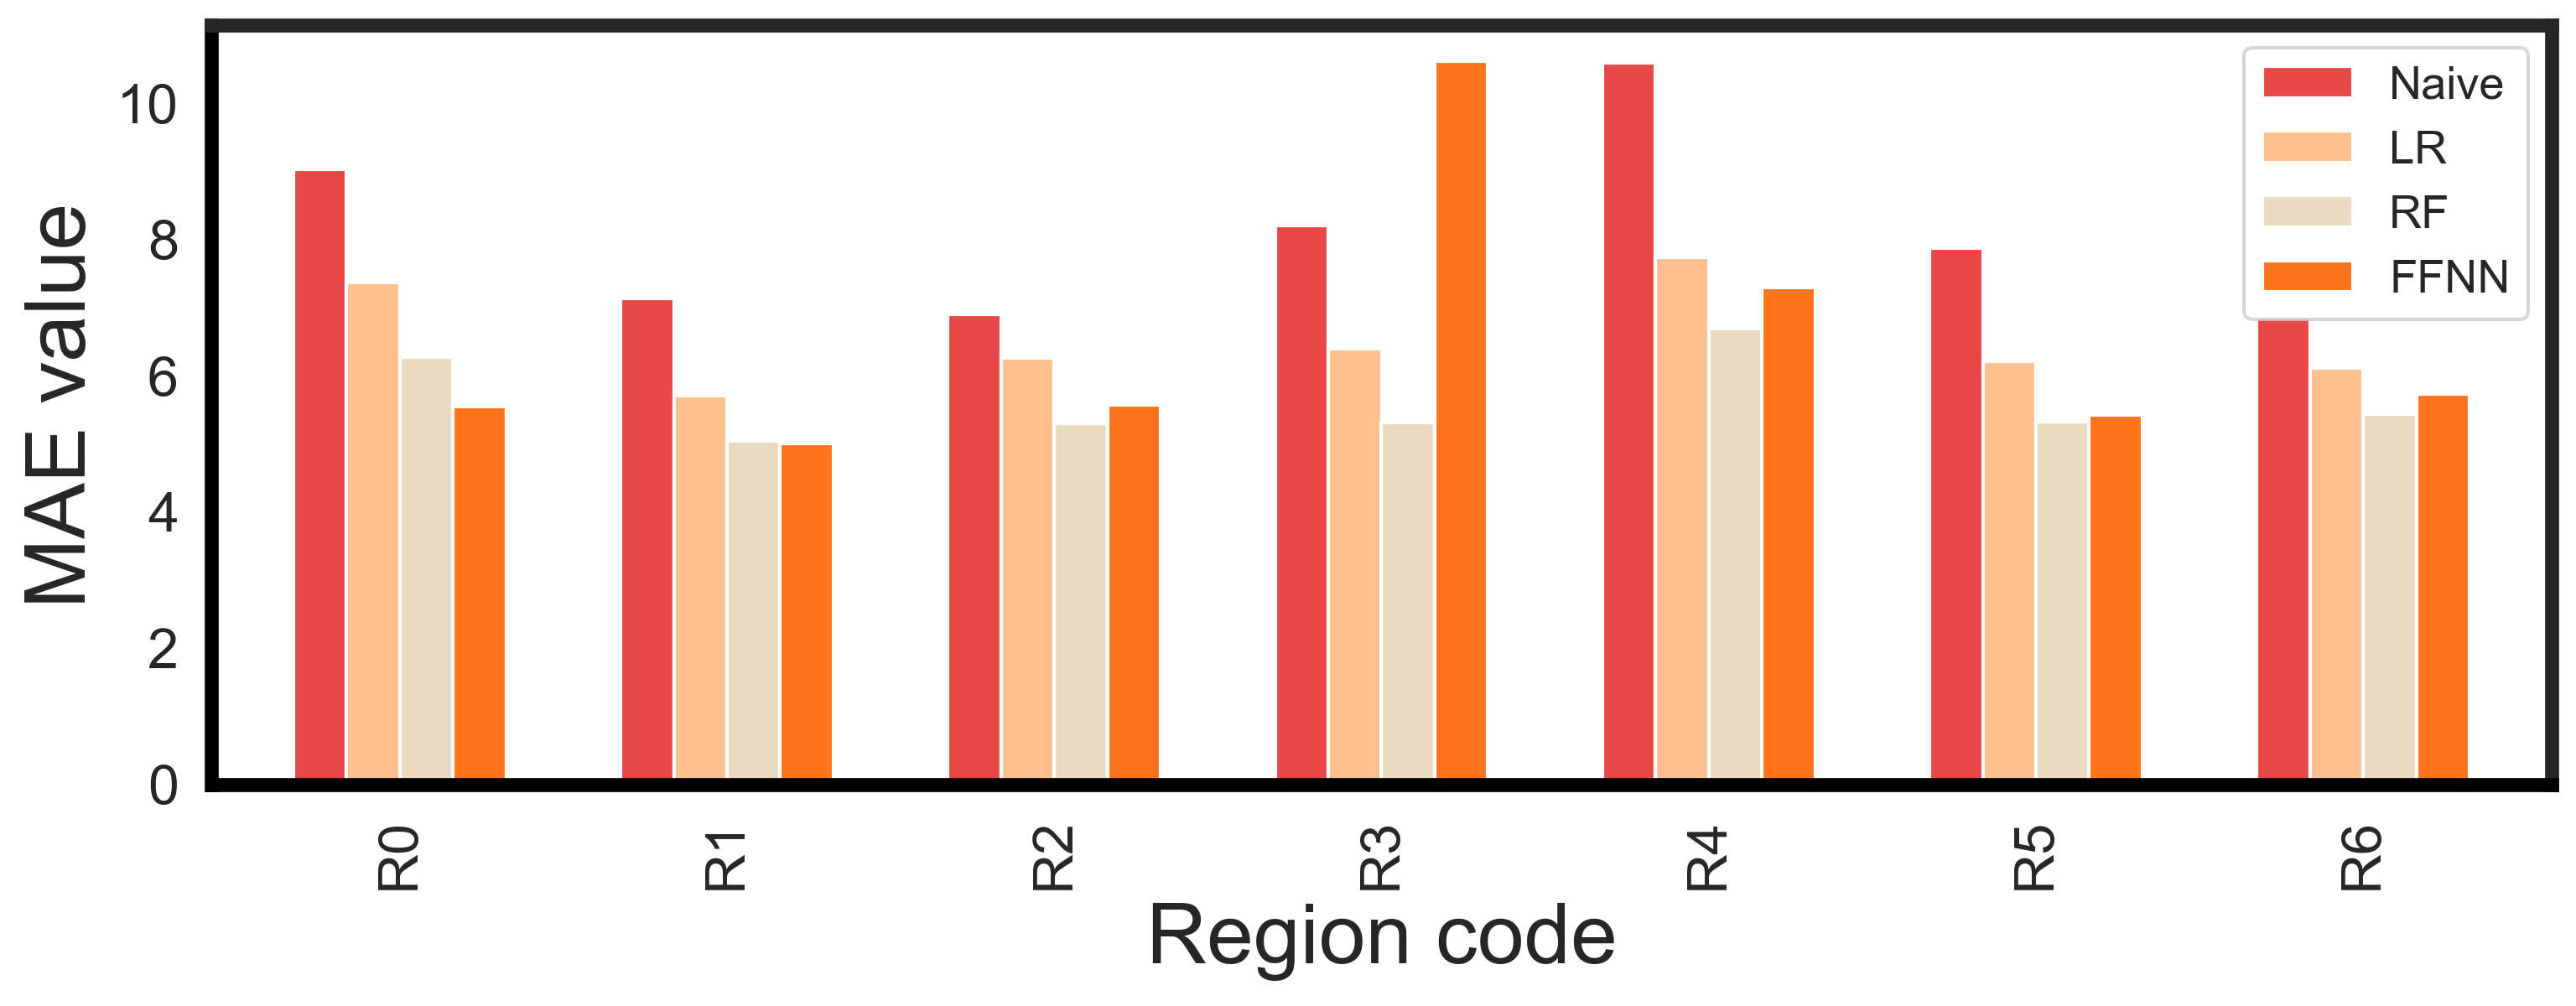

In [30]:
# plot the table for MAE
fig = MAE_table.plot(kind='bar',legend=True,color={"#FF731D","#E64848","#FFC090", "#E9DAC1"},figsize=(12, 4),width=0.65)
plt.xlabel("Region code",fontsize=24)
plt.ylabel("MAE value",fontsize=24)
fig.set_facecolor('w')
plt.setp(fig.spines.values(), linewidth=4)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.spines['bottom'].set_color('black')
fig.spines['left'].set_color('black')
fig.legend(prop={'size': 13})
plt.savefig('../output/results_vis1.png')

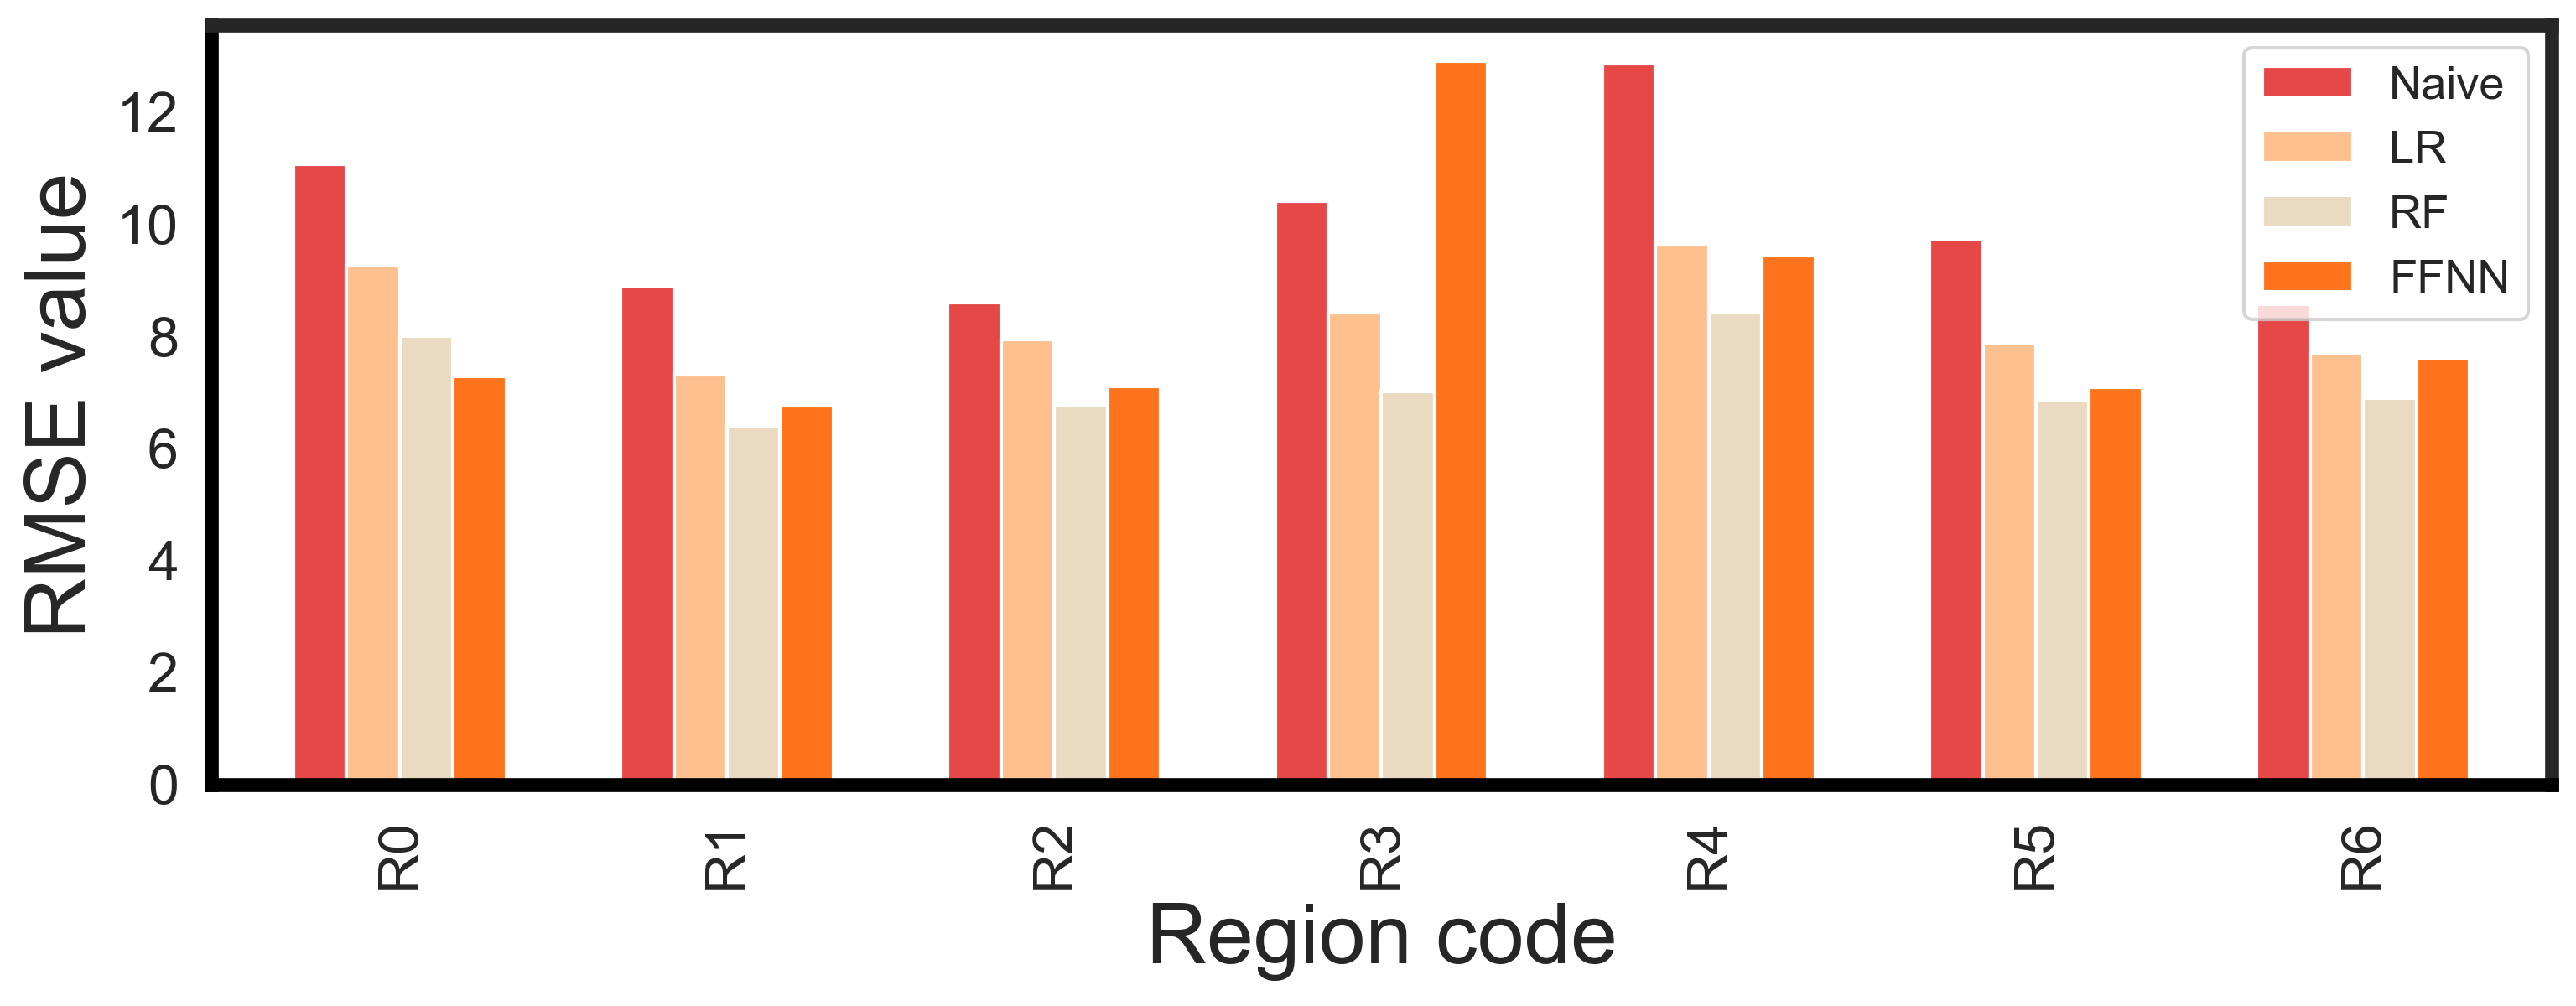

In [31]:
# plot the table for RMSE
fig = RMSE_table.plot(kind='bar',legend=True,color={"#FF731D","#E64848","#FFC090", "#E9DAC1"},figsize=(12, 4),width=0.65)
# fig(figsize=(12, 6), dpi=80)
plt.xlabel("Region code",fontsize=24)
plt.ylabel("RMSE value",fontsize=24)
fig.set_facecolor('w')
plt.setp(fig.spines.values(), linewidth=4)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.spines['bottom'].set_color('black')
fig.spines['left'].set_color('black')
fig.legend(prop={'size': 13})
plt.savefig('../output/results_vis2.png')

For both figures, we can see that random forest regression is the best because of its stability and accuracy. FFNN performs better in estimating the whole dataset, but it is unstable and sometimes under-fitting on the smaller dataset. We will choose random forest regression for smaller data and FFNN for larger data.